In [35]:
import piano_transcription_inference as pti
import librosa
import matplotlib.pyplot as plt
import numpy as np


audio, _ = pti.load_audio('data/15/223554/spleeter/accompaniment.wav', sr=16000, mono=True)
#audio, _ = pti.load_audio('data/15/223554/spleeter/vocals.wav', sr=16000, mono=True)
audio

/home/kelvinxu/work/imslp-mining/env/lib/python3.10/site-packages/piano_transcription_inference/utilities.py:556: FutureWarning: Pass orig_sr=44100, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.core.audio.resample(y, sr_native, sr, res_type=res_type)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [36]:
fft = librosa.stft(audio, n_fft=256)
db = librosa.amplitude_to_db(fft, amin=1e-5)

db.shape

/home/kelvinxu/work/imslp-mining/env/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


(129, 137013)

In [37]:
db.max(axis=-1).mean()

-12.858385

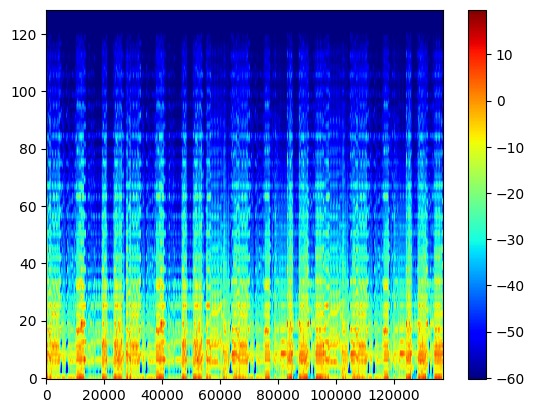

In [38]:
plt.imshow(db, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()

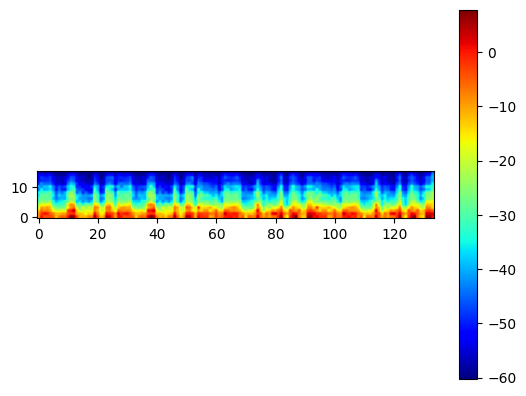

In [40]:
db_pad = np.pad(db, ((0, 0), (0, 1024 - db.shape[1] % 1024)))
thumb = db_pad.reshape(129, -1, 1024).mean(axis=-1)
thumb = thumb[:128].reshape(16, 8, -1).max(axis=1)

plt.imshow(thumb, origin='lower', cmap='jet')
plt.colorbar()